In [7]:
import numpy as np
from scipy.constants import c, pi
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook

In [2]:
wavelength = np.linspace(0.4,1.6,100) # Wavelengths in mico meter
f = c/wavelength  # Frequencies in Mega Hertz
df = f[1]-f[0]    # Frequency step in Mega Hertz

In [3]:
# Sellmier equation
B1, B2, B3 = 0.7136824, 0.4254807, 0.8964226
f1, f2, f3 = c/0.0617167, c/0.1270814, c/9.896161
epsilon = 1 + B1*f1**2/(f1**2 - f**2) + B2*f2**2/(f2**2 - f**2) + B3*f3**2/(f3**2 - f**2)
n = np.sqrt(epsilon)        # Refractive index
ng = n + f*np.gradient(n,f) # Groupe index
beta2 = 1/c * np.gradient(ng,2*pi*f) * (1e21)  # GVD parameter in ps^2/km
D = -2*pi*f**2/c *beta2 *(1e-9)   # Dispersion parameter D in ps/Km/nm

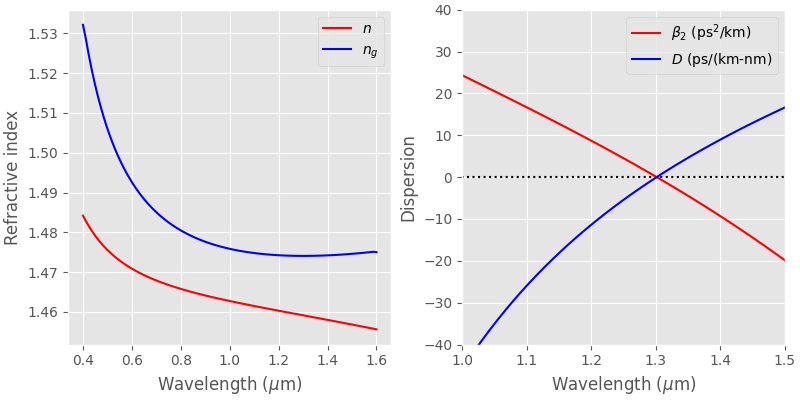

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,layout="constrained",figsize=(8, 4))
ax1.set(xlabel=r'Wavelength ($\mu$m)', ylabel='Refractive index')
ax2.set(xlabel=r'Wavelength ($\mu$m)', ylabel=r'Dispersion', xlim=(1,1.5), ylim=(-40,40))

ax1.plot(wavelength, n, 'r', label=r'$n$')
ax1.plot(wavelength, ng, 'b-',label=r'$n_g$')
ax1.legend()
ax2.plot(wavelength, 0*wavelength, 'k:')
ax2.plot(wavelength, beta2, 'r-', label=r'$\beta_2$ (ps$^2$/km)')
ax2.plot(wavelength, D, 'b-', label=r'$D$ (ps/(km-nm)')
ax2.legend()